In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Gray Scale Demonstration

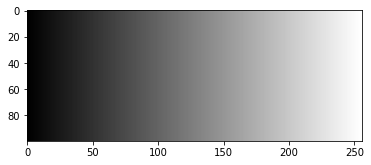

In [15]:
im = np.arange(256)
im = im[np.newaxis, :]
im = np.repeat(im, 100, axis=0)
plt.imshow(im, cmap='gray')

# Processing Gray Scale Imagen

In [16]:
im = plt.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\albert-einstein_gray.jpg')

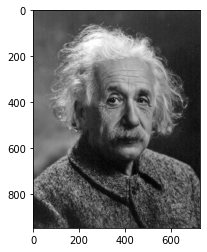

In [19]:
plt.imshow(im, cmap='gray')

In [23]:
im2 = im.copy()

In [24]:
im2[23:100,40:100] = 255

In [31]:
im2[300:400,40:100] = 0

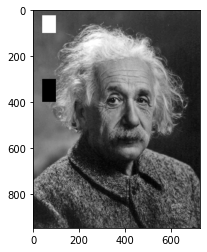

In [32]:
plt.imshow(im2, cmap='gray')

In [35]:
plt.imsave(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\albert-einstein_gray_modified_image.jpg', im2, cmap='gray')

## Exercise: Draw Patches on Albert Einstein's Eyes

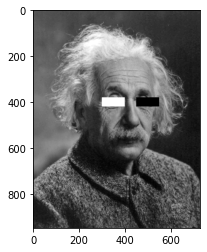

In [46]:
im3 = im.copy()

im3[380:420,300:400] = 255
im3[380:420, 450:550] = 0

plt.imshow(im3, cmap='gray')


In [45]:
plt.imsave(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\albert-einstein_gray_eye_patches.jpg', im3, cmap='gray')


# Grayscale Images in OpenCV

In [47]:
import cv2

In [48]:
img = cv2.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\albert-einstein_gray.jpg', cv2.IMREAD_GRAYSCALE)

In [49]:
type(img)

numpy.ndarray

In [50]:
img.dtype

dtype('uint8')

In [51]:
img.shape

(949, 728)

In [52]:
img[23,100] = 200

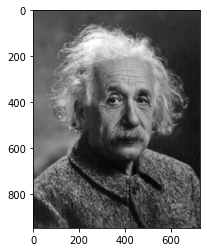

In [53]:
plt.imshow(img, cmap="gray")

In [54]:
cv2.imshow('Gray', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
cv2.imwrite(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\albert-einstein_gray_modified_opencv.jpg', img)

True

# RGB Images

In [17]:
cimg = plt.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\tulips.jpg')
R = cimg[:,:,0]
G = cimg[:,:,1]
B = cimg[:,:,2]

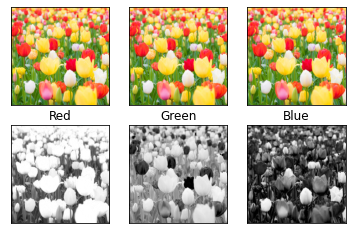

In [18]:
plt.figure(1)
plt.subplot(231)
plt.imshow(cimg)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(cimg)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(cimg)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(R, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Red')

plt.subplot(235)
plt.imshow(G, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Green')


plt.subplot(236)
plt.imshow(B, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Blue')

plt.show()

# OpenCV reads as BGR

In [29]:
cimg = cv2.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\tulips.jpg')
cimg = cimg[:,:,::-1]
R= cimg[:,:,0]
G = cimg[:,:,1]
B = cimg[:,:,2]

In [32]:
R[100:400, 100:400] = 100
G[100:400, 100:400] = 50
B[100:400, 100:400] = 70

cimg[:,:,0] = R
cimg[:,:,1] = G
cimg[:,:,2] = B

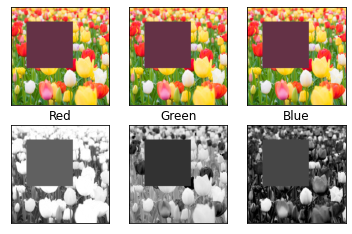

In [33]:
plt.figure(2)
plt.subplot(231)
plt.imshow(cimg)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(cimg)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(cimg)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(R, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Red')

plt.subplot(235)
plt.imshow(G, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Green')


plt.subplot(236)
plt.imshow(B, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Blue')

plt.show()

# Exercise: Create RGB and BGR images

In [72]:
# Create Red, Green and Blue Components
red = np.array([255,0,0])
green = np.array([0,255,0])
blue = np.array([0,0,255])

red = red[np.newaxis,:]
green = green[np.newaxis,:]
blue = blue[np.newaxis,:]

In [73]:
# Create Rows
red_row = np.repeat(red, 200, axis=0)
green_row = np.repeat(green, 200, axis=0)
blue_row = np.repeat(blue, 200, axis=0)

In [74]:
# Concatenate rows
rgb_row = np.concatenate((red_row,green_row, blue_row), axis=0)
bgr_row = np.concatenate((blue_row,green_row, red_row), axis=0)

rgb_row = rgb_row[np.newaxis,:]
bgr_row = bgr_row[np.newaxis,:]

In [75]:
# Create images
rgb_image = np.repeat(rgb_row, 600, axis=0)
rgb_image = rgb_image.astype('uint8')
bgr_image = np.repeat(bgr_row, 600, axis=0)


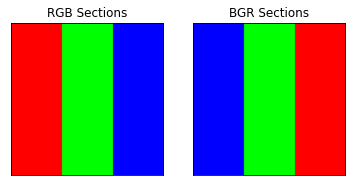

In [65]:
# Show images
plt.figure(3)
plt.subplot(121)
plt.imshow(rgb_image)
plt.xticks([])
plt.yticks([])
plt.title('RGB Sections')

plt.subplot(122)
plt.imshow(bgr_image)
plt.xticks([])
plt.yticks([])
plt.title('BGR Sections')

plt.show()

In [77]:
cv2.namedWindow("RGB", cv2.WINDOW_NORMAL)
cv2.imshow('RGB', rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# RGB to HSV conversion

In [80]:
"""
Converts an rgb value to hsv
Args:
    r : red value
    g : green value
    b : blue value

    scaleFactor: Is the range that we want to normalize the saturation and brightness. By default is [0, 1]

"""
def rgb_to_hsv(r,g,b,scaleFactor):
    r, g, b = r / 255.0, g/255.0, b/255.0   # Normalize rgb values
    cmax = max(r,g,b)   # Maximum value of r, g, b
    cmin = min(r,g,b)   # Minimum value of r, g, b
    diff = cmax - cmin
    # We can't divide by 0, so if they are the same, H is 0
    if cmax == cmin:
        h = 0
    # We will use modulo in the following operations, because values must fall in the 0 - 360 range
    elif cmax == r:
       h = (60 * ((g-b)/ (diff))) % 360
    elif cmax == g:
       h = ((60 * ((b-r)/ (diff))) + 120) % 360
    elif cmax == b:
       h = ((60 * ((r-g)/ (diff))) + 240) % 360

    v = cmax * scaleFactor
    s = 0

    # If max is 0, then saturation remains as 0
    if v != 0:
       s = diff / cmax * scaleFactor

    if h < 0:
       h += 360

    return h, s, v


In [81]:
print(rgb_to_hsv(100,200,50,100))|

(100.0, 75.0, 78.43137254901961)


In [82]:
img = cv2.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\tulips.jpg')

In [85]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Exercise: Convert HSV to RGB and BGR

In [88]:
# HSV to BGR
bgr_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

In [89]:
# HSV to RGB
rgb_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

# Mask HSV Images

In [94]:
img = cv2.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\tulips.jpg')

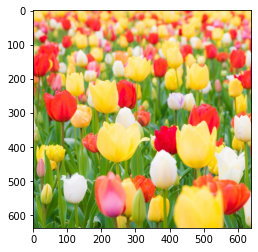

In [96]:
plt.imshow(img[:,:,::-1])

In [97]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [116]:
lr = np.array([0, 120, 70]) # Red color low boundary
ur = np.array([8, 255, 255])   # Red color upper boundary

mask1 = cv2.inRange(hsv, lr, ur)

In [117]:
lr = np.array([170, 120, 70]) # Red color low boundary
ur = np.array([180, 255, 255])   # Red color upper boundary

mask2 = cv2.inRange(hsv, lr, ur)

In [118]:
mask = mask1 | mask2

In [119]:
res = cv2.bitwise_and(img, img, mask=mask)

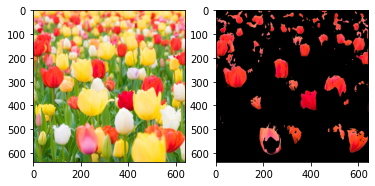

In [120]:
plt.figure(1)
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(res[:,:,::-1])
plt.show()

# Exercise: Extract Yellow Flowers using HSV masking

In [121]:
img = cv2.imread(r'D:\Cursos Online\Computer_Vision_in_python\practice\Unit 2\tulips.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [122]:
lr = np.array([20, 100, 100]) # Red color low boundary
ur = np.array([30, 255, 255])   # Red color upper boundary

mask = cv2.inRange(hsv, lr, ur)

In [123]:
res = cv2.bitwise_and(img, img, mask=mask)

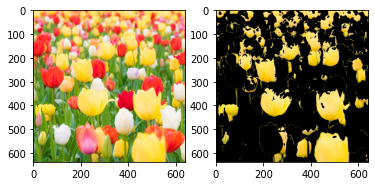

In [124]:
plt.figure(1)
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(res[:,:,::-1])
plt.show()